In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\archive (30)\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
X = df.drop('Sales', axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
y = df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [7]:
final_model = LinearRegression()

In [8]:
poly_features = poly_conv.fit_transform(X)
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    poly_features, y, test_size=0.33, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler() #it applies z score normalisation(standardisation)

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
scaled_X_train = scaler.transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

In [15]:
X_train[0]

array([1.87800000e+02, 2.11000000e+01, 9.50000000e+00, 3.52688400e+04,
       3.96258000e+03, 1.78410000e+03, 4.45210000e+02, 2.00450000e+02,
       9.02500000e+01, 6.62348815e+06, 7.44172524e+05, 3.35053980e+05,
       8.36104380e+04, 3.76445100e+04, 1.69489500e+04, 9.39393100e+03,
       4.22949500e+03, 1.90427500e+03, 8.57375000e+02])

In [16]:
scaled_X_train

array([[ 0.455913  , -0.15469995, -0.98899258, ..., -0.60618091,
        -0.56426029, -0.5063835 ],
       [-0.84432792,  1.60997604,  0.21389931, ...,  1.27808026,
         0.25379368, -0.22928072],
       [-0.2808111 ,  0.93019813,  2.36467003, ...,  2.13064753,
         2.9262847 ,  2.91162153],
       ...,
       [ 1.07281562, -1.32199535,  0.32937694, ..., -0.70151704,
        -0.50832904, -0.16601335],
       [ 0.77504147,  0.04442691, -1.2536288 , ..., -0.6570423 ,
        -0.58737703, -0.51185147],
       [ 0.16525695,  0.56627662,  1.09922775, ...,  0.67742414,
         0.75141387,  0.50797559]])

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge_model = Ridge(alpha = 5)

In [19]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

In [20]:
X_test

array([[7.47000000e+01, 4.94000000e+01, 4.57000000e+01, ...,
        1.11524452e+05, 1.03171406e+05, 9.54439930e+04],
       [2.55400000e+02, 2.69000000e+01, 5.50000000e+00, ...,
        3.97985500e+03, 8.13725000e+02, 1.66375000e+02],
       [1.12900000e+02, 1.74000000e+01, 3.86000000e+01, ...,
        1.16865360e+04, 2.59253040e+04, 5.75124560e+04],
       ...,
       [1.82600000e+02, 4.62000000e+01, 5.87000000e+01, ...,
        1.25291628e+05, 1.59190878e+05, 2.02262003e+05],
       [2.22400000e+02, 4.30000000e+00, 4.98000000e+01, ...,
        9.20802000e+02, 1.06641720e+04, 1.23505992e+05],
       [2.50900000e+02, 3.65000000e+01, 7.23000000e+01, ...,
        9.63216750e+04, 1.90796085e+05, 3.77933067e+05]])

In [21]:
test_predictions = ridge_model.predict(X_test)
test_predictions

array([14.09946594, 20.28533275, 13.19984073, 16.36273238,  7.48476647,
        7.09093181, 20.79815158, 18.82106916, 13.69701221, 20.09728294,
        9.09512998, 16.81543762, 17.110229  , 22.50552506, 18.72223751,
        9.14531079, 17.91904912, 11.17741116,  9.02076876, 21.38521918,
        6.99886971, 18.98485517, 26.88820824, 23.79668082, 10.30766856,
       15.2116949 , 20.88436725,  9.91685051, 15.49224876,  8.43606945,
        8.87870425, 20.03184016, 13.75434479,  7.76198437, 18.12857271,
       10.46326688, 11.38268059, 11.49217755,  7.4378652 , 14.64694706,
       13.19524774, 12.81214886, 12.09970341,  8.19371729, 11.54114994,
       10.74575615,  5.38122721, 17.84416863, 15.45234475, 22.05037769,
       10.16502984, 16.63552268, 19.04692645, 13.66037439, 15.74146908,
        5.28148032, 24.04882989,  9.07889642, 19.87159388, 16.79951975,
       16.93595957, 24.791291  ,  9.90626434, 20.60020455, 15.85543724,
       21.64625821])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, test_predictions)
MAE

1.1394948301909982

Text(0.5, 1.0, 'Newspaper Spend')

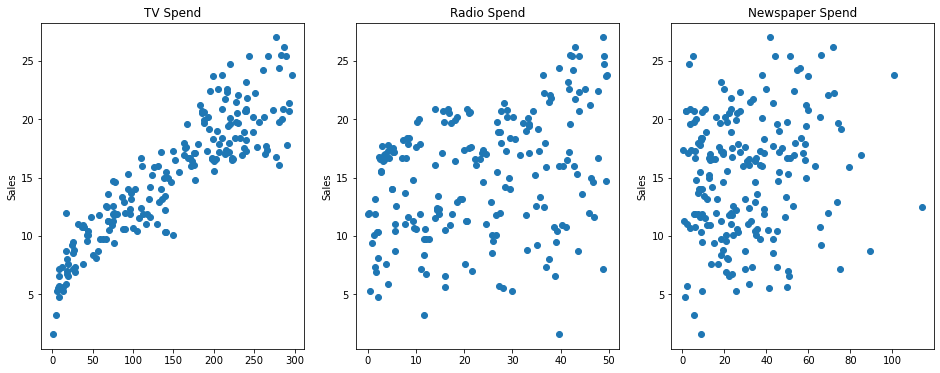

In [23]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")
#plt.tight_layout()

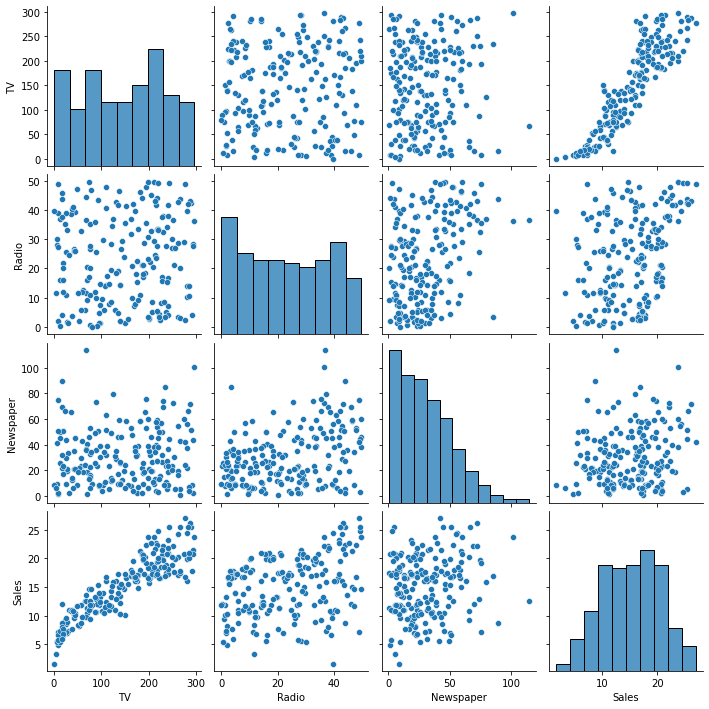

In [24]:
sns.pairplot(df)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

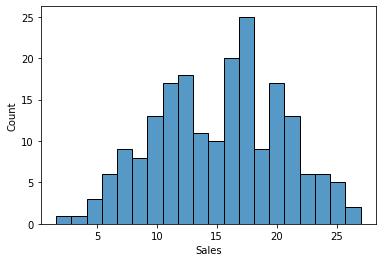

In [25]:
sns.histplot(data=df, x='Sales', bins=20) #distribution of sales

In [26]:
from sklearn.linear_model import LinearRegression
#help(LinearRegression)

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
test_pred = model.predict(X_test)
test_pred
test_residuals = y_test - test_pred
test_residuals

37     0.599451
109   -0.485707
31    -1.304287
89     0.334195
66     3.504460
         ...   
183    1.398573
127    2.010609
53     0.592210
100    0.841262
93     0.554296
Name: Sales, Length: 66, dtype: float64

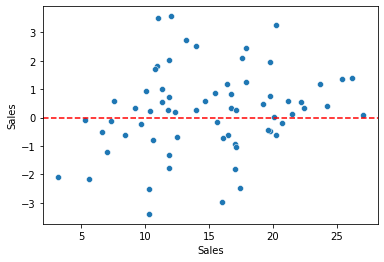

In [30]:
sns.scatterplot(x=y_test, y=test_residuals)
#it looks like random, no pattern in the residual plot can be seen so linear regression can be used
plt.axhline(y=0, color='red', ls='--')

<AxesSubplot:xlabel='total_spent', ylabel='Sales'>

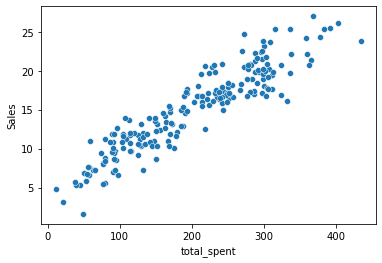

In [31]:
df['total_spent'] = df['TV'] + df['Radio'] + df['Newspaper']
sns.scatterplot(data=df, x='total_spent', y='Sales')

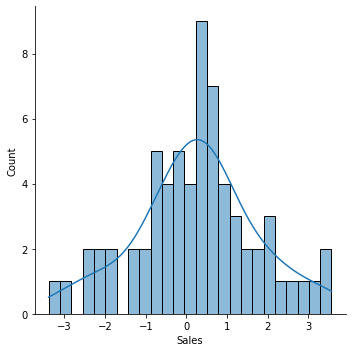

In [32]:
sns.displot(test_residuals, bins=25, kde=True) #kernel density estimation